<a href="./code.ipynb" class="link-button">Download</a>

<center><h1>
תרגול 1 - בעיות אופטימיזציה וגזירה וקטורית
</h1></center>

## Setup

In [ ]:
## Importing packages
import os # A build in package for interacting with the OS. For example to create a folder.
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package
import imageio  # A package to read and write image (is used here to save gif images)

## Setup matplotlib to output figures into the notebook
## - To make the figures interactive (zoomable, tooltip, etc.) use ""%matplotlib notebook" instead
%matplotlib inline

## Setting some nice matplotlib defaults
plt.rcParams['figure.figsize'] = (4.5, 4.5)  # Set default plot's sizes
plt.rcParams['figure.dpi'] = 120  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## Auxiliary function for prining equations, pandas tables and images in cells output
from IPython.core.display import display, HTML, Latex

## Create output folder
if not os.path.isdir('./output'):
    os.mkdir('./output')

## Circle fitting

### Generating points

In [ ]:
rand_gen = np.random.RandomState(1)
gt_center = np.array((3, 1))
gt_radius = 2
noise_std = 0.2

n_point = 30
points_angles = rand_gen.rand(n_point) * 2 * np.pi  # Draw random angles
points = np.stack((np.cos(points_angles), np.sin(points_angles)), axis=1)  # Generate points on the unit curcle  
points *= gt_radius  # Scale the circle by gt_raduis
points += gt_center[None, :]  # Move the corcle to the correct location
points += rand_gen.randn(n_point, 2) * noise_std  # Add random Gaussian noise

### Ploting the points

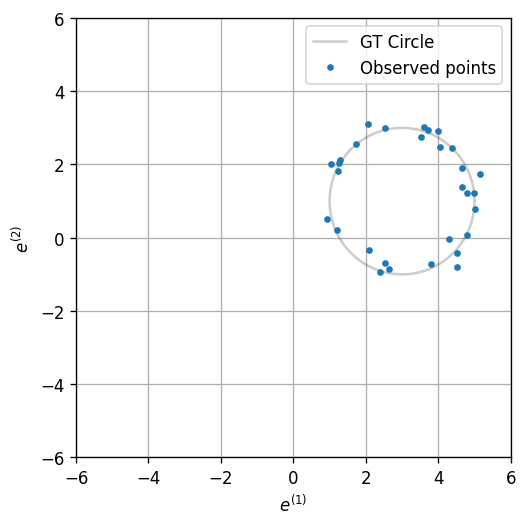

In [ ]:
angles = np.linspace(0, 2 * np.pi, 1000)
unit_circle = np.stack((np.cos(angles), np.sin(angles)), axis=1)
gt_circle = unit_circle * gt_radius
gt_circle += gt_center[None, :]


fig, ax = plt.subplots()
ax.set_xlabel('$e^{(1)}$')
ax.set_ylabel('$e^{(2)}$')
ax.plot(gt_circle[:, 0], gt_circle[:, 1], 'k', alpha=0.2, label='GT Circle')
ax.plot(points[:, 0], points[:, 1], '.', label='Observed points')
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.legend()
plt.tight_layout()
fig.savefig('./output/circle_dataset.png')

### Fitting a circle using grdient descent

The update step (according to excersize 1.4):

$$
\begin{aligned}
r^{(t+1)}&=r^{(t)}-\frac{2\eta}{n}\sum_{i=1}^n (r^{(t)}-\|\boldsymbol{x}^{(i)}-\boldsymbol{c}^{(t)}\|_2)\\
\boldsymbol{c}^{(t+1)}&=\boldsymbol{c}^{(t)}-\frac{2\eta}{n}\sum_{i=1}^n (r^{(t)}-\|\boldsymbol{x}^{(i)}-\boldsymbol{c}^{(t)}\|_2)\frac{\boldsymbol{x}^{(i)}-\boldsymbol{c}^{(t)}}{\|\boldsymbol{x}^{(i)}-\boldsymbol{c}^{(t)}\|_2}
\end{aligned}
$$

In [ ]:
## Initializing the parameters
center = np.array((0, 0))
radius = 1

## The algorithm's parameters controling the steps size
eta = 0.01

## Initializing the output figure
fig, ax = plt.subplots()
circle_obj = ax.plot([], [], 'r')[0]
ax.plot(points[:, 0], points[:, 1], '.')
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
title = ax.set_title('')
imgs = []

## Running the algorithm
for t in range(0, 501):
    points_tmp = points - center[None, :]  # an auxliriay valirable
    points_tmp_norm = (points_tmp ** 2).sum(axis=1) ** 0.5  # The l2 norm of the auxiliriay variable
    
    ## The update step
    new_radius = radius - eta * 2 * (radius - points_tmp_norm).mean()
    new_center = center - eta * 2 * (((radius - points_tmp_norm) / points_tmp_norm)[:, None] * points_tmp).mean(axis=0)
    
    radius = new_radius
    center = new_center
    
    ## Plot intermidiate 
    if t % 10 == 0:
        circle = unit_circle * radius
        circle += center[None, :]
        circle_obj.set_data(circle[:, 0], circle[:, 1])
        title.set_text(f'Step {t}')
        fig.canvas.draw()

        imgs.append(np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8').reshape(*fig.canvas.get_width_height(), 3))

imageio.mimsave('./output/circle_fitting_iterations.gif', imgs, fps=10)
plt.close(fig)
display(HTML('<img src="./output/circle_fitting_iterations.gif"/>'))